In [1]:
import sys
sys.path.append("..")

In [2]:
from library.simulator import BackTester, Runner
from library.strategy import TestStrategy, RunnerwithStrategy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# CSVデータを読み込む
df = pd.read_csv(
    "../input_data/btf_periods900.csv",
)
# UNIXtimeをpandas.Timestampに変換する
df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")

rename_dict = {
    "CloseTime": "timestamp",
    "OpenPrice": "open",
    "HighPrice": "high",
    "LowPrice": "low",
    "ClosePrice": "close",
    "Volume": "volume",
}
df = df[list(rename_dict.keys())].rename(columns=rename_dict).set_index("timestamp")

config = {"slippage": 0.001, "minutes_to_expire": 60}
tester = BackTester(df, config)
strategy = TestStrategy(df)
runner = RunnerwithStrategy(tester=tester, strategy=strategy)
runner.run()
snapshots = tester.snapshots
print(snapshots)

                               cash      position       valuation
timestamp                                                        
2023-01-26 21:45:00  1000000.000000  0.000000e+00  1000000.000000
2023-01-26 22:00:00  1000000.000000  0.000000e+00  1000000.000000
2023-01-26 22:15:00  1000000.000000  0.000000e+00  1000000.000000
2023-01-26 22:30:00  1000000.000000  0.000000e+00  1000000.000000
2023-01-26 22:45:00  1000000.000000  0.000000e+00  1000000.000000
...                             ...           ...             ...
2023-04-04 02:45:00   996635.427173  8.673617e-19   996635.427173
2023-04-04 03:00:00   996635.427173  8.673617e-19   996635.427173
2023-04-04 03:15:00   996635.427173  8.673617e-19   996635.427173
2023-04-04 03:30:00   996635.427173  8.673617e-19   996635.427173
2023-04-04 03:45:00   996635.427173  8.673617e-19   996635.427173

[6454 rows x 3 columns]


In [4]:
# for order in tester.archived_orders:
#     print(order.__dict__)

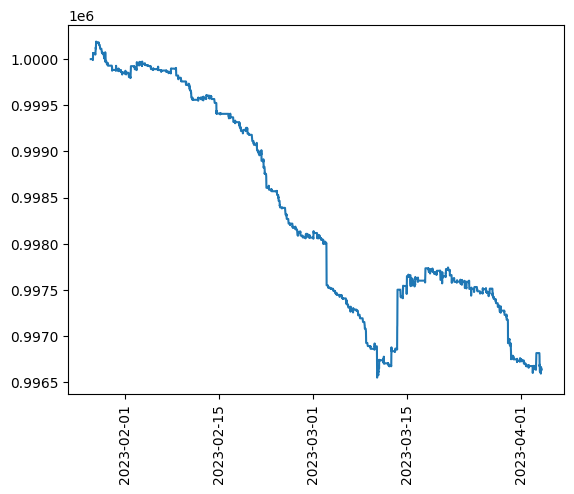

In [5]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(snapshots.index, snapshots["valuation"])
plt.show()

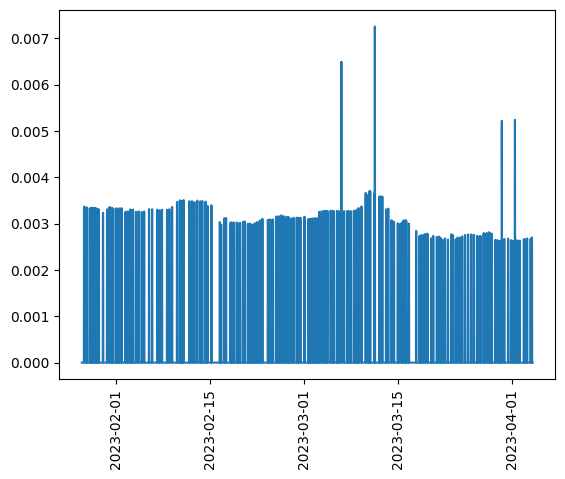

In [6]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(snapshots.index, snapshots["position"])
plt.show()